# Predicting heart disease using machine learning

This notebook looks into using various python-based machine learning and data science libraries in an attempt to build a 
machine learning model  of predicting whether or not someone has heart disease based on their medical attributes

FrameWork:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement,
"Given clinical parameters about a patient, can we predict whether or not they have heart disease?"

## 2. Data

The original data comes from the University of California Irvine's Machine Learning Repository at https://archive.ics.uci.edu/dataset/45/heart+disease

There is also an instance of the data on kaggel https://www.kaggle.com/datasets/rishidamarla/heart-disease-prediction

## 3. Evaluation

If we can reach 75% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

This is where you'll get different information about each of the features in the data

**Create data dictionary**

* Age in years
* Sex           (1 = male; 0 = female)
* Chest pain type (chest pain type)
*       *-- Value 1: typical angina
*       *-- Value 2: atypical angina
*       *-- Value 3: non-anginal pain
*       *-- Value 4: asymptomatic
* BP            (Resting blood pressure (in mm Hg on admission to the hospital))
* Cholestoral in mg/dl
* FBS over 120  (fasting blood sugar > 120 mg/d1) (1=true; 0=false)
* EKG Results   (electrocardiographic results)
* Max HR        (maximum heart rate achieved)
* Exercise angina(induced angina (1 = yes; 0 = no))
* ST Depression (Depression induced by exercise relative to rest)
* ST slope      (Slope of the peak exercise ST segment)
* Fluro         (Number of major vessels (0-3) colored by fluoroscopy)
* Thallium      (3 = normal; 6 = fixed defect; 7 = reversible defect)
* target Presence or Absence

In [1]:
# Import libraries

# Regular EDA (exploratory data analysis
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# SciKit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


# Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay


# Convert into ONNX format.
from skl2onnx import to_onnx

In [2]:
# Load data into pandas dataframe
df = pd.read_csv("Heart_Disease_Prediction.csv")
df.shape

(270, 14)

## Data exploration (exploratory data analysis or EDA)

In [3]:
df["Heart Disease"].value_counts()

Heart Disease
Absence     150
Presence    120
Name: count, dtype: int64

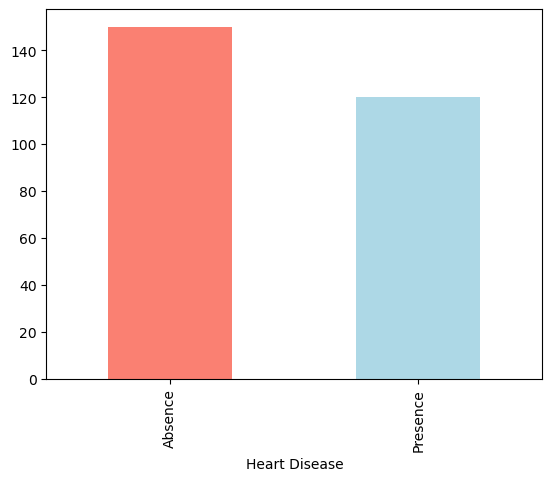

In [4]:
df["Heart Disease"].value_counts().plot(kind = "bar", color = ["salmon", "lightblue"]);

In [5]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [6]:
# Check for missing values
df.isna().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [7]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [8]:
df["Sex"].value_counts();

In [9]:
# Compare Sex to target(Heart Disease)
pd.crosstab(df["Heart Disease"], df.Sex)

# Males seem to have relatively more Heart Disease presence than Females.
# Chance of heart disease if male:   ~55%
# Chance of heart disease if female: ~20%

# Average chance of heart disease:  ~37.5%

Sex,0,1
Heart Disease,,
Absence,67,83
Presence,20,100


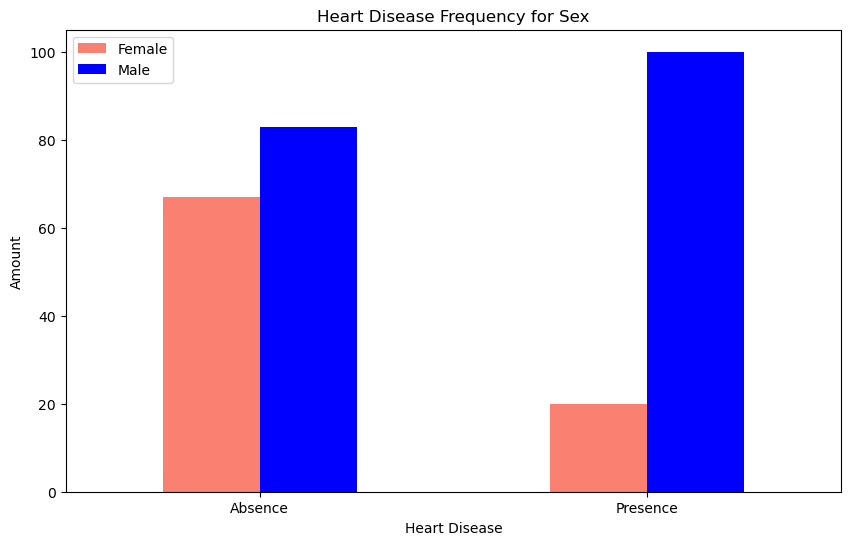

In [10]:
# Create a plot of crosstabl
pd.crosstab(df["Heart Disease"], df.Sex).plot(kind="bar", figsize=(10,6), color=["salmon", "blue"])
plt.title("Heart Disease Frequency for Sex")
plt.ylabel("Amount")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

In [11]:
df["Max HR"].value_counts()

Max HR
162    10
160     9
163     8
172     7
125     7
       ..
184     1
124     1
71      1
118     1
137     1
Name: count, Length: 90, dtype: int64

Text(0.5, 0, 'Age')

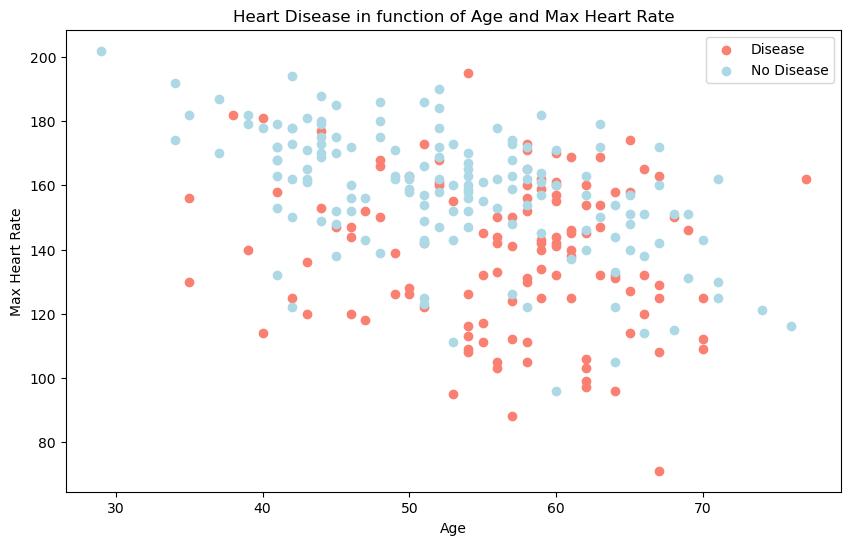

In [12]:
# Age vs. Max Heart Rate for Heart Disease
plt.figure(figsize=(10,6))
plt.scatter(df["Age"][df["Heart Disease"] == "Presence"], df["Max HR"][df["Heart Disease"] == "Presence"],
           c="salmon");

# Age vs. Max Heart Rate for Non Heart Disease
plt.scatter(df["Age"][df["Heart Disease"] == "Absence"], df["Max HR"][df["Heart Disease"] == "Absence"],
           c="lightblue");

# Add some info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate")
plt.xlabel("Age")

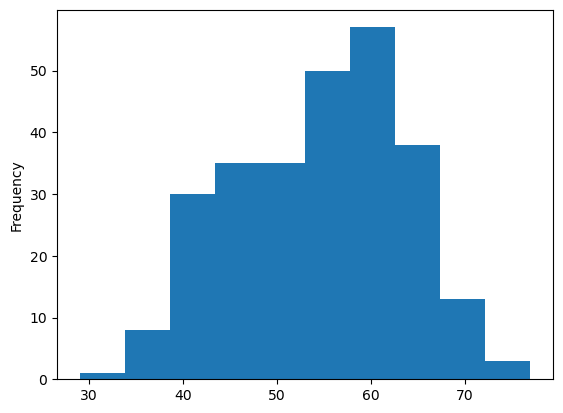

In [13]:
# Check Distribution of the age column with a histogram
df.Age.plot.hist();

In [14]:
# Check if chest pain is related to heart disease

pd.crosstab(df["Chest pain type"], df["Heart Disease"])

Heart Disease,Absence,Presence
Chest pain type,,
1,15,5
2,35,7
3,62,17
4,38,91


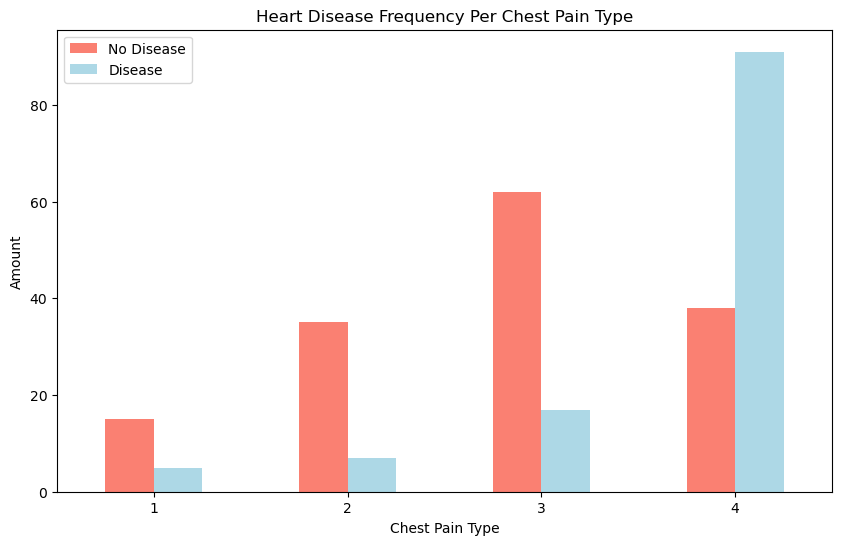

In [15]:
# Make crosstab visual
pd.crosstab(df["Chest pain type"], df["Heart Disease"]).plot(kind="bar", figsize=(10,6), color=(["salmon", "lightblue"]))

plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.legend(["No Disease", "Disease"])
plt.ylabel("Amount")
plt.xlabel("Chest Pain Type")
plt.xticks(rotation=0);

In [16]:
# Convert Target column to binary (Presence: 1, Absence: 0)
df["Heart Disease"][df["Heart Disease"] == "Presence"] = 1
df["Heart Disease"][df["Heart Disease"] == "Absence"] = 0


/var/folders/x_/t6jyvg0924l00bg976s22wjc0000gn/T/ipykernel_83185/4187290745.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["Heart Disease"][df["Heart Disease"] == "Presence"] = 1
/var/folders/x_/t6jyvg0924l00bg976s22wjc0000gn/T/ipyke

In [17]:
df["Heart Disease"] = df["Heart Disease"].astype(int)

In [18]:
# Make a correlation matrix
df.corr()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
Age,1.000000,-0.094401,0.096920,0.273053,0.220056,0.123458,0.128171,-0.402215,0.098297,0.194234,0.159774,0.356081,0.106100,0.212322
Sex,-0.094401,1.000000,0.034636,-0.062693,-0.201647,0.042140,0.039253,-0.076101,0.180022,0.097412,0.050545,0.086830,0.391046,0.297721
Chest pain type,0.096920,0.034636,1.000000,-0.043196,0.090465,-0.098537,0.074325,-0.317682,0.353160,0.167244,0.136900,0.225890,0.262659,0.417436
BP,0.273053,-0.062693,-0.043196,1.000000,0.173019,0.155681,0.116157,-0.039136,0.082793,0.222800,0.142472,0.085697,0.132045,0.155383
Cholesterol,0.220056,-0.201647,0.090465,0.173019,1.000000,0.025186,0.167652,-0.018739,0.078243,0.027709,-0.005755,0.126541,0.028836,0.118021
FBS over 120,0.123458,0.042140,-0.098537,0.155681,0.025186,1.000000,0.053499,0.022494,-0.004107,-0.025538,0.044076,0.123774,0.049237,-0.016319
EKG results,0.128171,0.039253,0.074325,0.116157,0.167652,0.053499,1.000000,-0.074628,0.095098,0.120034,0.160614,0.114368,0.007337,0.182091
Max HR,-0.402215,-0.076101,-0.317682,-0.039136,-0.018739,0.022494,-0.074628,1.000000,-0.380719,-0.349045,-0.386847,-0.265333,-0.253397,-0.418514
Exercise angina,0.098297,0.180022,0.353160,0.082793,0.078243,-0.004107,0.095098,-0.380719,1.000000,0.274672,0.255908,0.153347,0.321449,0.419303
ST depression,0.194234,0.097412,0.167244,0.222800,0.027709,-0.025538,0.120034,-0.349045,0.274672,1.000000,0.609712,0.255005,0.324333,0.417967


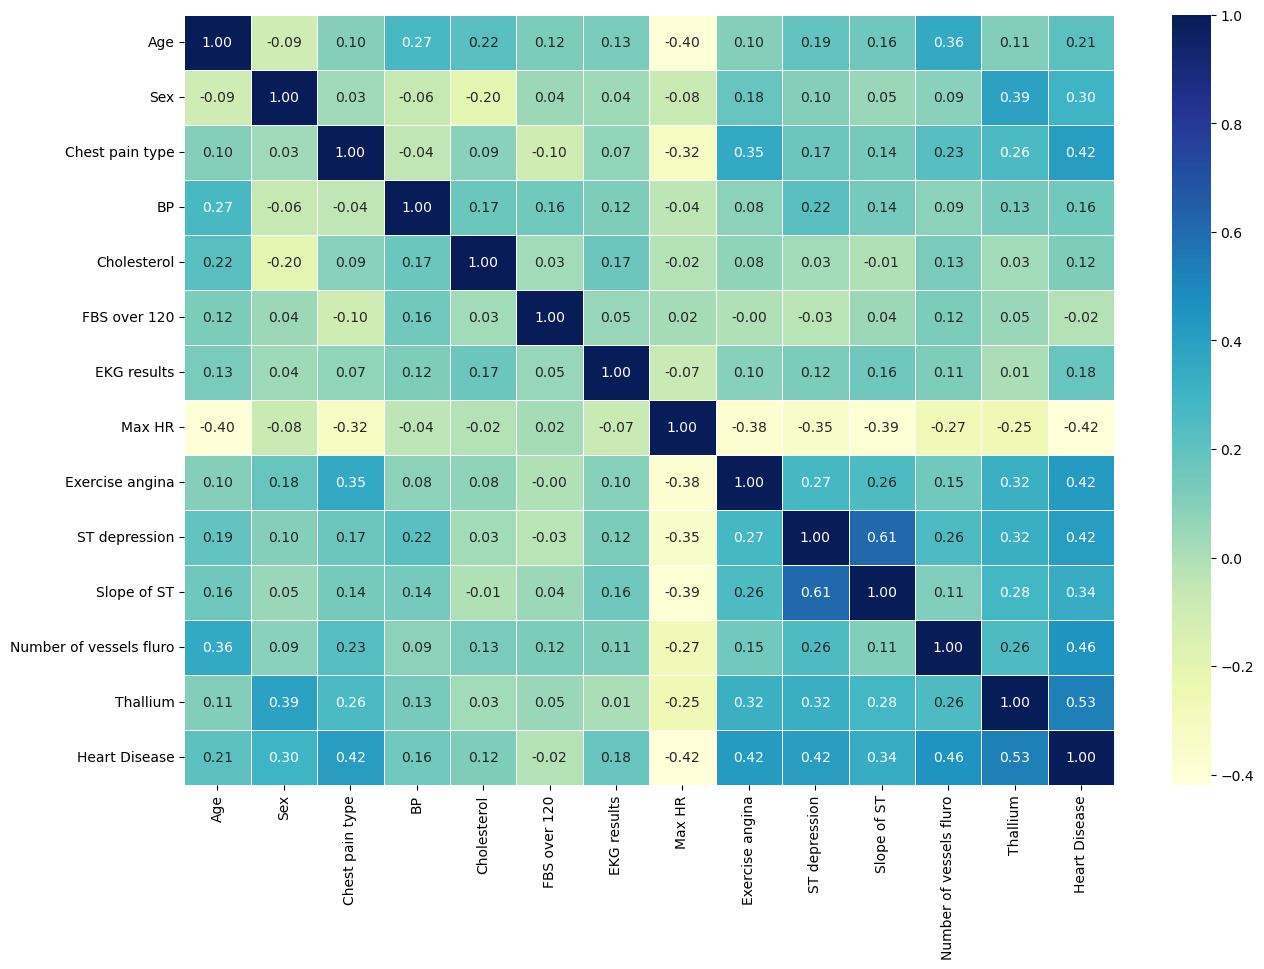

In [19]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix, annot=True, linewidth=0.5,
                 fmt=".2f", cmap="YlGnBu");

## Modeling

In [20]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [21]:
# Split data into Features & Labels
X = df.drop("Heart Disease", axis = 1)  # Features
y = df["Heart Disease"]                 # Labels

np.random.seed(42)

# Create Train & Test Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [22]:
# Machine learning models to test
# 1. Logistic Regression
# 2. K-Nearest Neighbor
# 3. Random Forest Classifier

# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)

    model_scores = {}

    for name, model in models.items():
        # Fit data to the model
        model.fit(X_train, y_train)
        #Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
        
    return model_scores

In [23]:
# Fit & Score Models
model_scores = fit_and_score(models=models, 
                             X_train=X_train, 
                             X_test=X_test, 
                             y_train=y_train, 
                             y_test=y_test)
model_scores

/Users/teejay/Documents/Udemy_Code/Machine_Learning_Projects/heart_disease_project/env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.9074074074074074,
 'KNN': 0.6481481481481481,
 'Random Forest': 0.7962962962962963}

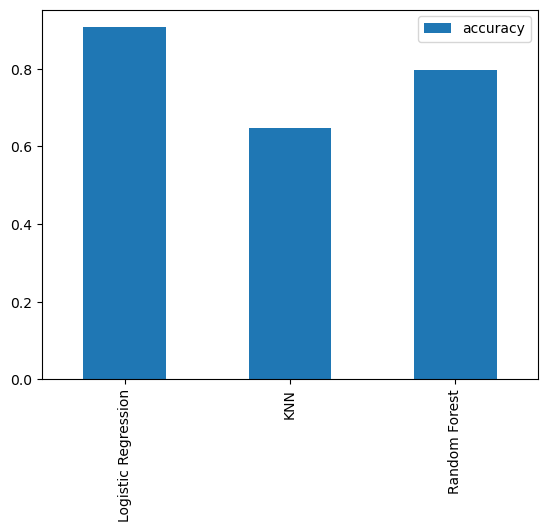

In [24]:
# Model comparisons
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

In [25]:
'''
Evaluation/Tuning:
1. Hyperparameter tuning
2. Feature Importance
3. Confusion Matrix
4. Cross-validation
5. precision
6. Recall
7. F1 Score
8. Classification Report
9. ROC Curve
10. Area under the curve (AUC)
''';

In [26]:
# HyperParameter Tuning

# Tune KNN
train_scores = []
test_scores = []

# Create list of different values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Looop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)

    # Fit the algorithm
    knn.fit(X_train, y_train)

    # Update training scores list
    train_scores.append(knn.score(X_train, y_train))

    # Update test score list
    test_scores.append(knn.score(X_test, y_test))

    

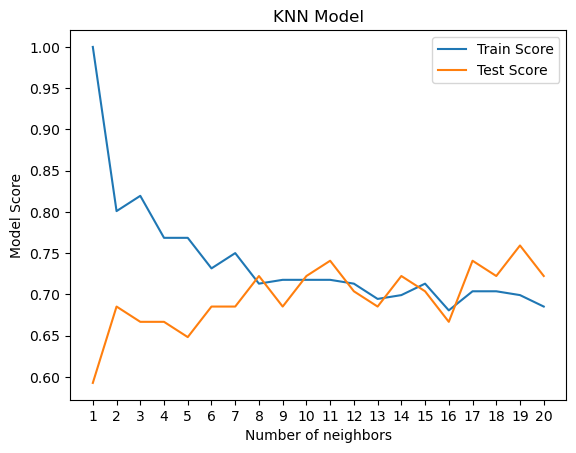

In [27]:
plt.plot(neighbors, train_scores, label="Train Score")

plt.plot(neighbors, test_scores, label="Test Score");
plt.title("KNN Model")
plt.xticks(np.arange(1,21))
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend();

In [28]:
# HyperParameter tuning with RandomizedSearchCV

# Hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ['liblinear']}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [29]:
# Tune LogisticRegression
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(), 
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparameter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [30]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [31]:
rs_log_reg.score(X_test, y_test)

0.9074074074074074

In [32]:
# Tune RandomForestClassifier
np.random.seed(42)

# Setup random hyperparameter search for LogisticRegression
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hpyerparameter search model for RandomForestClassifier
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [33]:
# Find best hyperparameter for RandomForest
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [34]:
# Score for the RandomForest
rs_rf.score(X_test, y_test)

0.8518518518518519

In [35]:
# Hyperparameter Tuning with GridSearchCV

# Hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ['liblinear']}

# Setup grid hyperparameter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [36]:
# Find best hyperparameter for Logistic Regression
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [37]:
# Score for LogisticRegression
gs_log_reg.score(X_test, y_test)

0.9074074074074074

In [38]:
# Evaluating tuned machine learning classifier

# Make predictions
y_preds = gs_log_reg.predict(X_test)

In [39]:
y_preds

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1])

In [40]:
np.array(y_test)

array([1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1])

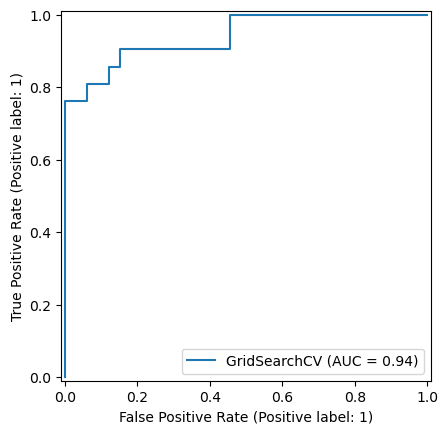

In [41]:
# Plot ROC curve and calculate AUC metric
RocCurveDisplay.from_estimator(gs_log_reg, X_test, y_test)

In [42]:
# Confusion matrix
confusion_matrix(y_test, y_preds)

array([[33,  0],
       [ 5, 16]])

In [43]:
sns.set(font_scale=1.5)
def plot_conf_mat(y_test, y_preds):
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                        annot=True,
                        cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    

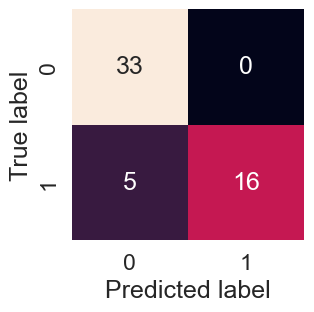

In [44]:
plot_conf_mat(y_test, y_preds)

In [45]:
# Classification Report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        33
           1       1.00      0.76      0.86        21

    accuracy                           0.91        54
   macro avg       0.93      0.88      0.90        54
weighted avg       0.92      0.91      0.90        54



In [46]:
# Evaluate using cross-validation 
clf = LogisticRegression(C=0.20433597178569418, solver='liblinear')

# CV Accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
cv_acc = np.mean(cv_acc)

In [47]:
# CV Precision
cv_precision = cross_val_score(clf, X, y, cv=5, scoring='precision')
cv_precision = np.mean(cv_precision)

In [48]:
# CV Recall
cv_recall = cross_val_score(clf, X, y, cv=5, scoring='recall')
cv_recall = np.mean(cv_recall)

In [49]:
# CV F1
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring='f1')
cv_f1 = np.mean(cv_f1)

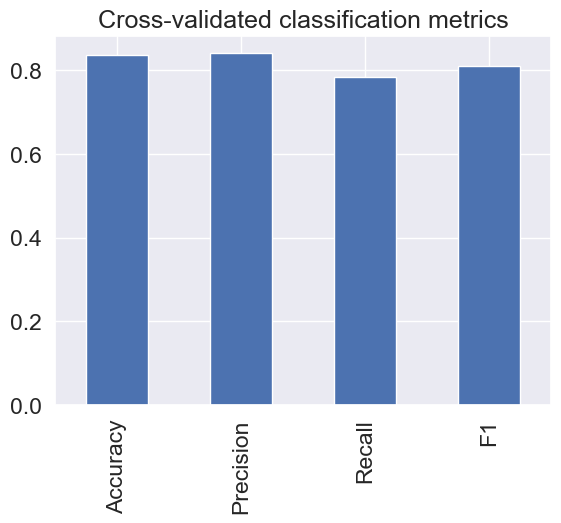

In [50]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                         index=[0])
cv_metrics.T.plot.bar(title="Cross-validated classification metrics", legend=False);

In [51]:
# Features Importance
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [52]:
clf.fit(X_train, y_train);

In [53]:
# Check coef_
clf.coef_

array([[-0.04388018,  0.3667732 ,  0.43459075,  0.01154172,  0.00283704,
        -0.221834  ,  0.12422896, -0.03091633,  0.37517786,  0.46914544,
         0.15420385,  0.69811102,  0.35955031]])

In [54]:
# Match coefs features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'Age': -0.04388017751832068,
 'Sex': 0.366773203113758,
 'Chest pain type': 0.43459074764279293,
 'BP': 0.011541717550386878,
 'Cholesterol': 0.002837040987204769,
 'FBS over 120': -0.22183400363382152,
 'EKG results': 0.12422895991880252,
 'Max HR': -0.030916329003525905,
 'Exercise angina': 0.3751778620928082,
 'ST depression': 0.46914544227115174,
 'Slope of ST': 0.1542038541181505,
 'Number of vessels fluro': 0.6981110243623491,
 'Thallium': 0.35955031130717313}

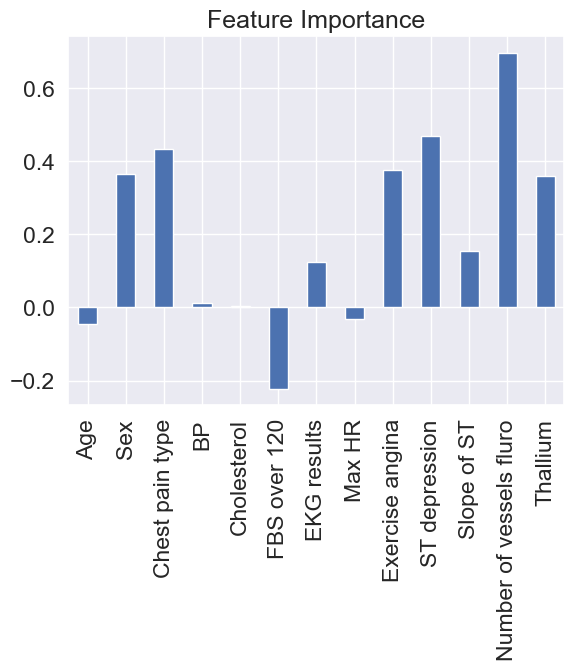

In [55]:
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [56]:
import joblib

# save
joblib.dump(clf, "Heart_Disease_model.pkl") 

['Heart_Disease_model.pkl']

In [57]:
import joblib
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

# Load your scikit-learn model
model = joblib.load('Heart_Disease_model.pkl')

# Convert the scikit-learn model to ONNX format
initial_type = [('float_input', FloatTensorType([None, X_train.shape[1]]))]
onnx_model = convert_sklearn(model, initial_types=initial_type)

# Save the ONNX model to a file
with open('Heart_Disease_model.onnx', 'wb') as f:
    f.write(onnx_model.SerializeToString())